# Практическая работа 2: "Работа с табличными данными" (для препод-ля)


**Задание 1**. Подключение библиотек

<p>При выполнении практической работы будут использоваться следующие библиотеки:</p>
<table>
    <tr>
        <th>Библиотека</th>
        <th>Назначение</th>
    </tr>
    <tr>
        <td><a href="https://pandas.pydata.org/docs/">Pandas</a></td>
    </tr>
    <tr>
        <td><a href="https://numpy.org/doc/">Numpy</a></td>
    </tr>
    <tr>
        <td><a href="https://matplotlib.org/stable/index.html">Matplotlib</a></td>
    </tr>
    
</table>
Заполните колонку "Назначение" в таблице и ниже подключите библиотеки для работы.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Задание 2**. Интеграция данных

***Интеграция данных*** - это процесс объединения данных их нескольких источников в единый набор данных (датасет). Объединение можно выполнить как *вертикально* (обычное склеивание), так и *горизонтальное* (аналог *join*() по ключу).

Создайте **2 набора данных** и проведите их *вертикальное* склеивание, используя функцию *concat*().

Ответьте на следующие вопросы:
1. Как создать набор данных?
2. Какие параметры принимает функция *concat*()?

In [61]:
# Создаем первый датафрейм 5x5
df1 = pd.DataFrame(
    np.random.randint(0, 100, size=(5, 5)),
    columns=[f'A{i}' for i in range(1, 6)]
)

# Создаем второй датафрейм 5x5 (те же столбцы!)
df2 = pd.DataFrame(
    np.random.randint(0, 100, size=(5, 5)),
    columns=[f'A{i}' for i in range(1, 6)]
)

# Вертикальное склеивание (axis=0)
df_concat = pd.concat([df1, df2], axis=0)

print("DataFrame 1:")
print(df1)

print("\nDataFrame 2:")
print(df2)

print("\nРезультат вертикального склеивания:")
print(df_concat)

DataFrame 1:
   A1  A2  A3  A4  A5
0  26  60  39  75  37
1  72  48  61  41  40
2  78  47  73  32  16
3  36  77  38  19  46
4  63  44  51  60  54

DataFrame 2:
   A1  A2  A3  A4  A5
0  71  95  64  27  16
1  33  89  31   2  66
2  28  46  29  15   5
3  39  15  34  76  57
4  73   5  85  25  88

Результат вертикального склеивания:
   A1  A2  A3  A4  A5
0  26  60  39  75  37
1  72  48  61  41  40
2  78  47  73  32  16
3  36  77  38  19  46
4  63  44  51  60  54
0  71  95  64  27  16
1  33  89  31   2  66
2  28  46  29  15   5
3  39  15  34  76  57
4  73   5  85  25  88


Создайте **2 набора данных** и выполните *горизонтальное* склеивание, используя функцию merge().

Ответьте на следующие вопросы:
1. В чем разница между *concat*() и *merge*()?
2. Какие параметры принимает функция *merge*()?
3. Выполните *left*, *right*, *inner*, *outher* склеивание и сделайте выводы, относительно разницы полученных результатов.

In [62]:
df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'A': [10, 20, 30],
    'B': [100, 200, 300]
})

df2 = pd.DataFrame({
    'id': [2, 3, 4],
    'C': [400, 500, 600],
    'D': [40, 50, 60]
})

print("\nLEFT DATASET:")
print(df1)

print("\nRIGHT DATASET:")
print(df2)

# INNER_JOIN (по умолчанию)
inner_merge = pd.merge(df1, df2, on='id', how='inner')

# LEFT_JOIN
left_merge = pd.merge(df1, df2, on='id', how='left')

# RIGHT_JOIN
right_merge = pd.merge(df1, df2, on='id', how='right')

# OUTER_JOIN
outer_merge = pd.merge(df1, df2, on='id', how='outer')

print("\nINNER MERGE:")
print(inner_merge)

print("\nLEFT MERGE:")
print(left_merge)

print("\nRIGHT MERGE:")
print(right_merge)

print("\nOUTER MERGE:")
print(outer_merge)


LEFT DATASET:
   id   A    B
0   1  10  100
1   2  20  200
2   3  30  300

RIGHT DATASET:
   id    C   D
0   2  400  40
1   3  500  50
2   4  600  60

INNER MERGE:
   id   A    B    C   D
0   2  20  200  400  40
1   3  30  300  500  50

LEFT MERGE:
   id   A    B      C     D
0   1  10  100    NaN   NaN
1   2  20  200  400.0  40.0
2   3  30  300  500.0  50.0

RIGHT MERGE:
   id     A      B    C   D
0   2  20.0  200.0  400  40
1   3  30.0  300.0  500  50
2   4   NaN    NaN  600  60

OUTER MERGE:
   id     A      B      C     D
0   1  10.0  100.0    NaN   NaN
1   2  20.0  200.0  400.0  40.0
2   3  30.0  300.0  500.0  50.0
3   4   NaN    NaN  600.0  60.0


**Задание 3**. Оценка объема данных


***Оценка объема данных*** необходима для определения сложности решаемой задачи и достаточности данных для ее решения. Оценка объема позволяет определить не только количество данных, но также и количество атрибутов.
1. Загрузите датасет *parkinson_disease.csv* из курса.
2. При помощи методов *shape*(), *size*() и *info*() изучите набор данных:    

*   какие атрибуты и какого типа представлены,
*   размер набора данных,
*   количество строк и колонок,
*   есть ли пропущенные строки и т.д.
3. Сделать выводы относительно качества исходных данных.

In [63]:
data = pd.read_csv('parkinson_disease.csv')
data

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [64]:
print(data.size)
print(data.shape)
print(len(data.index))
print(len(data.columns))

570780
(756, 755)
756
755


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


Размер 756 строк на 755 столбцов
749 столбцов с типом float, 6 с типом int 64
Используемая память 4,4 Мб

**Задание 4**. Преобразование и очистка данных

4.1. Определить количество ***уникальных*** значений в каждом столбце. Оценить возможность преобразования данных в числовые значения.

In [66]:
data.nunique()

,0
id,252
gender,2
PPE,740
DFA,745
RPDE,748
...,...
tqwt_kurtosisValue_dec_33,752
tqwt_kurtosisValue_dec_34,753
tqwt_kurtosisValue_dec_35,753
tqwt_kurtosisValue_dec_36,754


4.2. Получите информацию по ***атрибутам***: количество, средние значения, отклонения, квартили.

Сделать выводы по полученным данным.

In [67]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,756.0,125.500000,72.793721,0.000000,62.750000,125.500000,188.250000,251.00000
gender,756.0,0.515873,0.500079,0.000000,0.000000,1.000000,1.000000,1.00000
PPE,756.0,0.746284,0.169294,0.041551,0.762833,0.809655,0.834315,0.90766
DFA,756.0,0.700414,0.069718,0.543500,0.647053,0.700525,0.754985,0.85264
RPDE,756.0,0.489058,0.137442,0.154300,0.386537,0.484355,0.586515,0.87123
...,...,...,...,...,...,...,...,...
tqwt_kurtosisValue_dec_33,756.0,12.375335,16.341665,1.628700,3.114375,4.741450,12.201325,73.53220
tqwt_kurtosisValue_dec_34,756.0,14.799230,15.722502,1.861700,3.665925,6.725700,21.922050,62.00730
tqwt_kurtosisValue_dec_35,756.0,14.751559,14.432979,1.955900,3.741275,7.334250,22.495175,57.54430
tqwt_kurtosisValue_dec_36,756.0,31.481110,34.230991,2.364000,3.948750,10.637250,61.125325,156.42370


4.3. Преобразуйте **категориальные** признаки, предварительно проверив возможность этого преобразования.

Проверьте данные на пустоту и проанализируйте можно ли преобразовать признаки в числовой формат, повторяются ли данные, дублируются ли они.

In [68]:
data.isnull().sum()

,0
id,0
gender,0
PPE,0
DFA,0
RPDE,0
...,...
tqwt_kurtosisValue_dec_33,0
tqwt_kurtosisValue_dec_34,0
tqwt_kurtosisValue_dec_35,0
tqwt_kurtosisValue_dec_36,0


In [69]:
print(data['id'])

0        0
1        0
2        0
3        1
4        1
      ... 
751    250
752    250
753    251
754    251
755    251
Name: id, Length: 756, dtype: int64


4.4. Проверить набор данных на **дубликаты**

Можно заметить, что есть дублирование данных по ***id***. Можно склеить строки с одинаковым значением, расcчитав среднее по каждому из атрибутов.

In [70]:
data = data.groupby('id').mean().reset_index()
data.drop('id', axis=1, inplace=True)
data

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1.0,0.823387,0.696370,0.567250,235.333333,234.333333,0.008220,0.000073,0.001963,0.000016,...,1.561733,2.862000,12.293333,9.717500,9.055300,6.259100,4.021533,4.164333,22.961700,1.0
1,0.0,0.415637,0.793993,0.592453,213.333333,211.000000,0.008884,0.001849,0.005790,0.000050,...,4.918567,4.827133,6.117633,8.599667,5.737233,7.933133,5.490533,4.941833,4.467233,1.0
2,1.0,0.801973,0.619967,0.520563,319.333333,318.333333,0.006041,0.000104,0.002217,0.000013,...,41.129400,31.201933,14.584467,5.446800,3.462000,4.772067,9.176633,11.848100,5.552367,1.0
3,0.0,0.828707,0.626097,0.537183,493.000000,492.000000,0.003913,0.000042,0.000757,0.000003,...,1.677633,1.908400,2.842167,3.493867,3.282433,3.085267,3.184433,4.032933,22.773633,1.0
4,0.0,0.831287,0.779397,0.726717,362.666667,361.666667,0.005622,0.002023,0.003593,0.000021,...,4.104600,4.285233,2.953200,2.799933,2.645100,2.811367,7.268333,13.338833,63.766900,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.0,0.751703,0.651830,0.586847,326.000000,324.666667,0.005911,0.000251,0.003193,0.000019,...,19.298667,15.072200,13.479700,14.877933,22.053767,20.532267,17.000400,16.132633,40.472133,1.0
248,1.0,0.611750,0.688327,0.452343,356.666667,355.333333,0.005410,0.000964,0.002467,0.000014,...,4.448533,3.180933,2.880233,2.805067,2.872667,3.071367,3.957200,4.962500,2.890800,1.0
249,1.0,0.819857,0.788800,0.373520,339.666667,338.666667,0.005684,0.000042,0.000800,0.000005,...,90.482767,65.641367,29.098533,8.966500,6.558600,11.885633,16.674300,14.303767,11.819967,1.0
250,0.0,0.600530,0.569010,0.411987,402.333333,401.000000,0.004775,0.000103,0.000983,0.000005,...,2.674667,2.714200,2.706000,2.637700,3.816233,3.421233,4.149200,5.726533,13.467700,0.0


**Задание 5**. Матрица корреляции

5.1. Постройте матрицу корреляции для всех признаков и сделайте выводы.

5.2. Используя *corr*(), удалим ***сильнокоррелирующие*** признаки, корреляция которых превосходит 0,7. Определим, текущий размер датасета.


In [71]:
exclude_cols = ['class']
cols_to_analyze = [col for col in data.columns if col not in exclude_cols]

if cols_to_analyze:
    # Вычисляем корреляционную матрицу
    corr_matrix = data[cols_to_analyze].corr().abs()

    # Находим признаки для удаления
    cols_to_drop = set()

    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > 0.7:
                col_j = corr_matrix.columns[j]
                if col_j not in cols_to_drop:
                    cols_to_drop.add(col_j)

    # Удаляем признаки
    cols_to_keep = [col for col in data.columns if col not in cols_to_drop]
    data = data[cols_to_keep]

print(data.shape)

(252, 208)


5.3. *Уменьшим* количество признаков, используя методику хи-квадрат Пирсона, и оставим только те, которые оказывают наибольшее влияние.

Для этого необходимо:
1. Удалить результирующую колонку.
2. Нормализовать значения в диапазоне от 0 до 1.
3. Применить хи-квадрат для выбора $n$ и более признаков (в качестве учебной задачи можем взять **10** признаков).
4. Извлечь 10 признаков и соединить их с результирующей колонкой.

In [72]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

In [73]:
original_index = data.index
X = data.drop('class', axis=1)
X_norm = MinMaxScaler().fit_transform(X)
selector = SelectKBest(chi2, k=10)
selector.fit(X_norm, data['class'])
selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]

# Создаем новый DataFrame
new_data = pd.DataFrame(
    data=X_norm[:, selected_mask],
    columns=selected_features,
    index=original_index
)

# Добавляем целевую переменную
new_data['class'] = data['class'].values

data = new_data
data

,gender,DFA,VFER_mean,mean_MFCC_2nd_coef,tqwt_energy_dec_12,tqwt_energy_dec_26,tqwt_energy_dec_27,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_28,class
0,1.0,0.475707,0.023988,0.699390,0.003052,0.143241,0.226463,0.003293,0.000374,0.000191,1.0
1,0.0,0.806469,0.011114,0.703870,0.008626,0.197350,0.006093,0.001114,0.001689,0.018258,1.0
2,1.0,0.216841,0.093791,0.331279,0.067683,0.479730,0.098498,0.000201,0.000368,0.213153,1.0
3,0.0,0.237611,0.208954,0.434929,0.093537,0.000083,0.000105,0.009404,0.018881,0.000815,1.0
4,0.0,0.757013,0.074051,0.750377,0.040505,0.002137,0.000950,0.006695,0.009538,0.013877,1.0
...,...,...,...,...,...,...,...,...,...,...,...
247,0.0,0.324799,0.059927,0.483557,0.094777,0.146977,0.003755,0.000073,0.000198,0.095655,1.0
248,1.0,0.448455,0.049171,0.546324,0.036361,0.573723,0.138429,0.001697,0.001554,0.015728,1.0
249,1.0,0.788873,0.002765,0.577215,0.005946,0.358357,0.003180,0.000280,0.000571,0.478783,1.0
250,0.0,0.044193,0.467034,0.185494,0.279487,0.001630,0.000104,0.002686,0.045271,0.006181,0.0


5.4. Постройте ***матрицу корреляции*** для **10** признаков и сделайте выводы.

In [74]:
corr = data.corr()
corr

,gender,DFA,VFER_mean,mean_MFCC_2nd_coef,tqwt_energy_dec_12,tqwt_energy_dec_26,tqwt_energy_dec_27,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_28,class
gender,1.000000,0.104643,-0.337383,0.205909,-0.245784,0.291594,0.335770,-0.062228,-0.282943,-0.117443,0.182713
DFA,0.104643,1.000000,-0.429840,0.699657,-0.350405,0.408285,0.352284,-0.202777,-0.281183,-0.171115,0.322357
VFER_mean,-0.337383,-0.429840,1.000000,-0.386871,0.227908,-0.296462,-0.241598,0.588367,0.606375,0.325246,-0.303920
mean_MFCC_2nd_coef,0.205909,0.699657,-0.386871,1.000000,-0.514572,0.286826,0.263610,-0.188998,-0.368397,-0.317385,0.414709
tqwt_energy_dec_12,-0.245784,-0.350405,0.227908,-0.514572,1.000000,-0.283089,-0.220861,0.184923,0.291820,0.163660,-0.347586
tqwt_energy_dec_26,0.291594,0.408285,-0.296462,0.286826,-0.283089,1.000000,0.586763,-0.130808,-0.277604,-0.130917,0.236263
tqwt_energy_dec_27,0.335770,0.352284,-0.241598,0.263610,-0.220861,0.586763,1.000000,-0.080221,-0.179475,-0.299010,0.201504
tqwt_kurtosisValue_dec_25,-0.062228,-0.202777,0.588367,-0.188998,0.184923,-0.130808,-0.080221,1.000000,0.575614,0.305918,-0.208101
tqwt_kurtosisValue_dec_26,-0.282943,-0.281183,0.606375,-0.368397,0.291820,-0.277604,-0.179475,0.575614,1.000000,0.461981,-0.394855
tqwt_kurtosisValue_dec_28,-0.117443,-0.171115,0.325246,-0.317385,0.163660,-0.130917,-0.299010,0.305918,0.461981,1.000000,-0.321180


(*) 5.5. Постройте ***тепловую матрицу корреляции*** и сделайте выводы.

<Axes: >

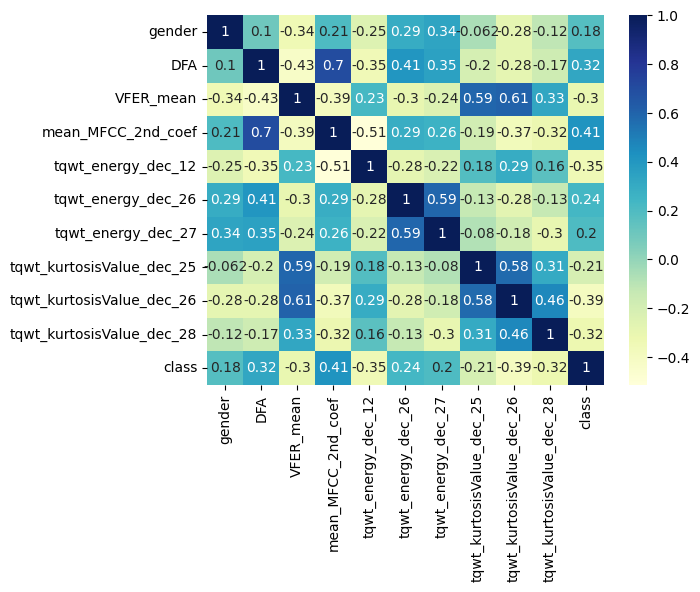

In [75]:
import seaborn as sns
co_mtx = data.corr(numeric_only=True)
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

Напишите выводы на основе полученной корреляционной матрицы.

**Задание 6**. Визуализация данных

Описание шкалы измерения атрибутов, визуализация.
Реализуйте функцию для визуализации атрибутов `visualize_dataset_attributes()`.


In [76]:
def visualize_dataset_attributes(data, target_col='class', figsize=(20, 15)):

    # Определяем типы признаков
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

    # Убираем целевую переменную из численных признаков для анализа
    if target_col in numeric_cols:
        numeric_cols.remove(target_col)

    # 1. Распределение числовых признаков
    if numeric_cols:
        n_numeric = len(numeric_cols)
        n_cols = 4  # Фиксируем 4 графика в ряду
        n_rows = int(np.ceil(n_numeric / n_cols))

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize[0], n_rows * 5))
        axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]

        for idx, col in enumerate(numeric_cols):
            if idx >= len(axes):
                break

            ax = axes[idx]

            # Гистограмма с KDE
            sns.histplot(data[col], kde=True, ax=ax, bins=30, color='skyblue')
            ax.set_title(f'{col}\n(n={len(data[col].dropna())})', fontsize=11)
            ax.set_xlabel('')
            ax.set_ylabel('Частота')

            # Добавляем статистику в текстовом виде
            stats_text = f"mean: {data[col].mean():.2f}\n"
            stats_text += f"std: {data[col].std():.2f}\n"
            stats_text += f"min: {data[col].min():.2f}\n"
            stats_text += f"max: {data[col].max():.2f}"

            ax.text(0.05, 0.95, stats_text,
                   transform=ax.transAxes,
                   verticalalignment='top',
                   fontsize=9,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        # Скрываем лишние оси
        for idx in range(len(numeric_cols), len(axes)):
            axes[idx].set_visible(False)

        plt.suptitle('Распределение числовых признаков (гистограммы)', fontsize=16, y=1.02)
        plt.tight_layout()
        plt.show()

    # 2. Boxplot для числовых признаков
    if numeric_cols:
        n_numeric = len(numeric_cols)
        n_cols = 4  # Фиксируем 4 графика в ряду
        n_rows = int(np.ceil(n_numeric / n_cols))

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize[0], n_rows * 4))
        axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]

        for idx, col in enumerate(numeric_cols):
            if idx >= len(axes):
                break

            ax = axes[idx]

            # Boxplot
            sns.boxplot(y=data[col], ax=ax, color='lightgreen')
            ax.set_title(col, fontsize=11)
            ax.set_ylabel('Значения')

            # Добавляем информацию о выбросах
            q1 = data[col].quantile(0.25)
            q3 = data[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]

            ax.text(0.05, 0.95, f'Выбросы: {len(outliers)}\n({len(outliers)/len(data)*100:.1f}%)',
                   transform=ax.transAxes,
                   verticalalignment='top',
                   fontsize=9,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        # Скрываем лишние оси
        for idx in range(len(numeric_cols), len(axes)):
            axes[idx].set_visible(False)

        plt.suptitle('Boxplot числовых признаков', fontsize=16, y=1.02)
        plt.tight_layout()
        plt.show()

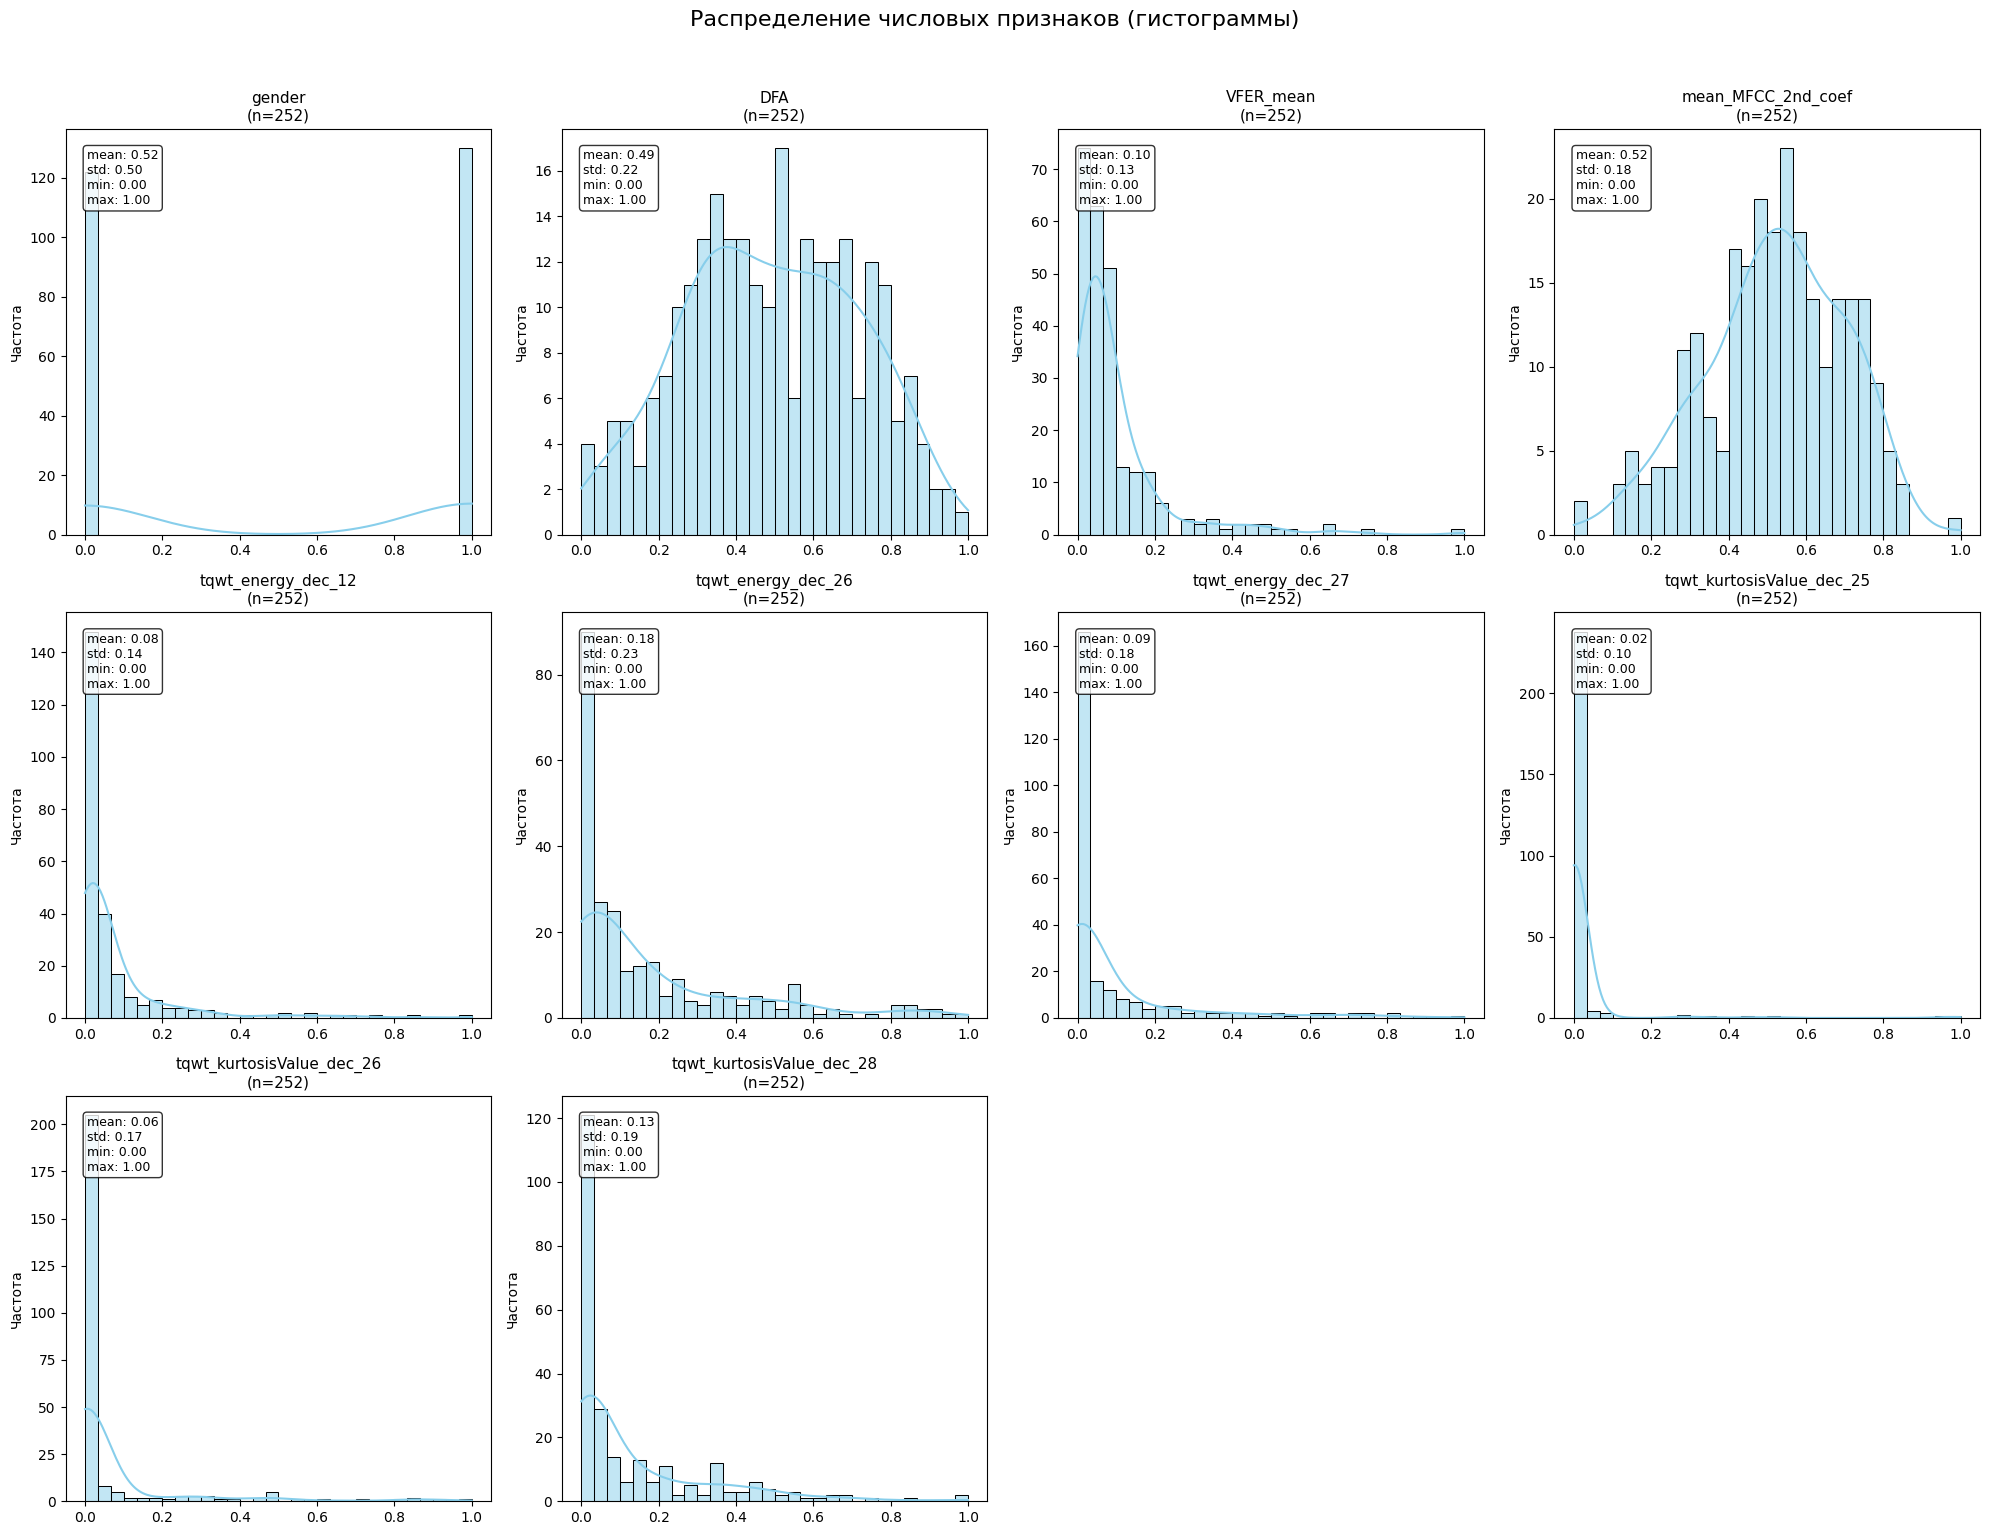

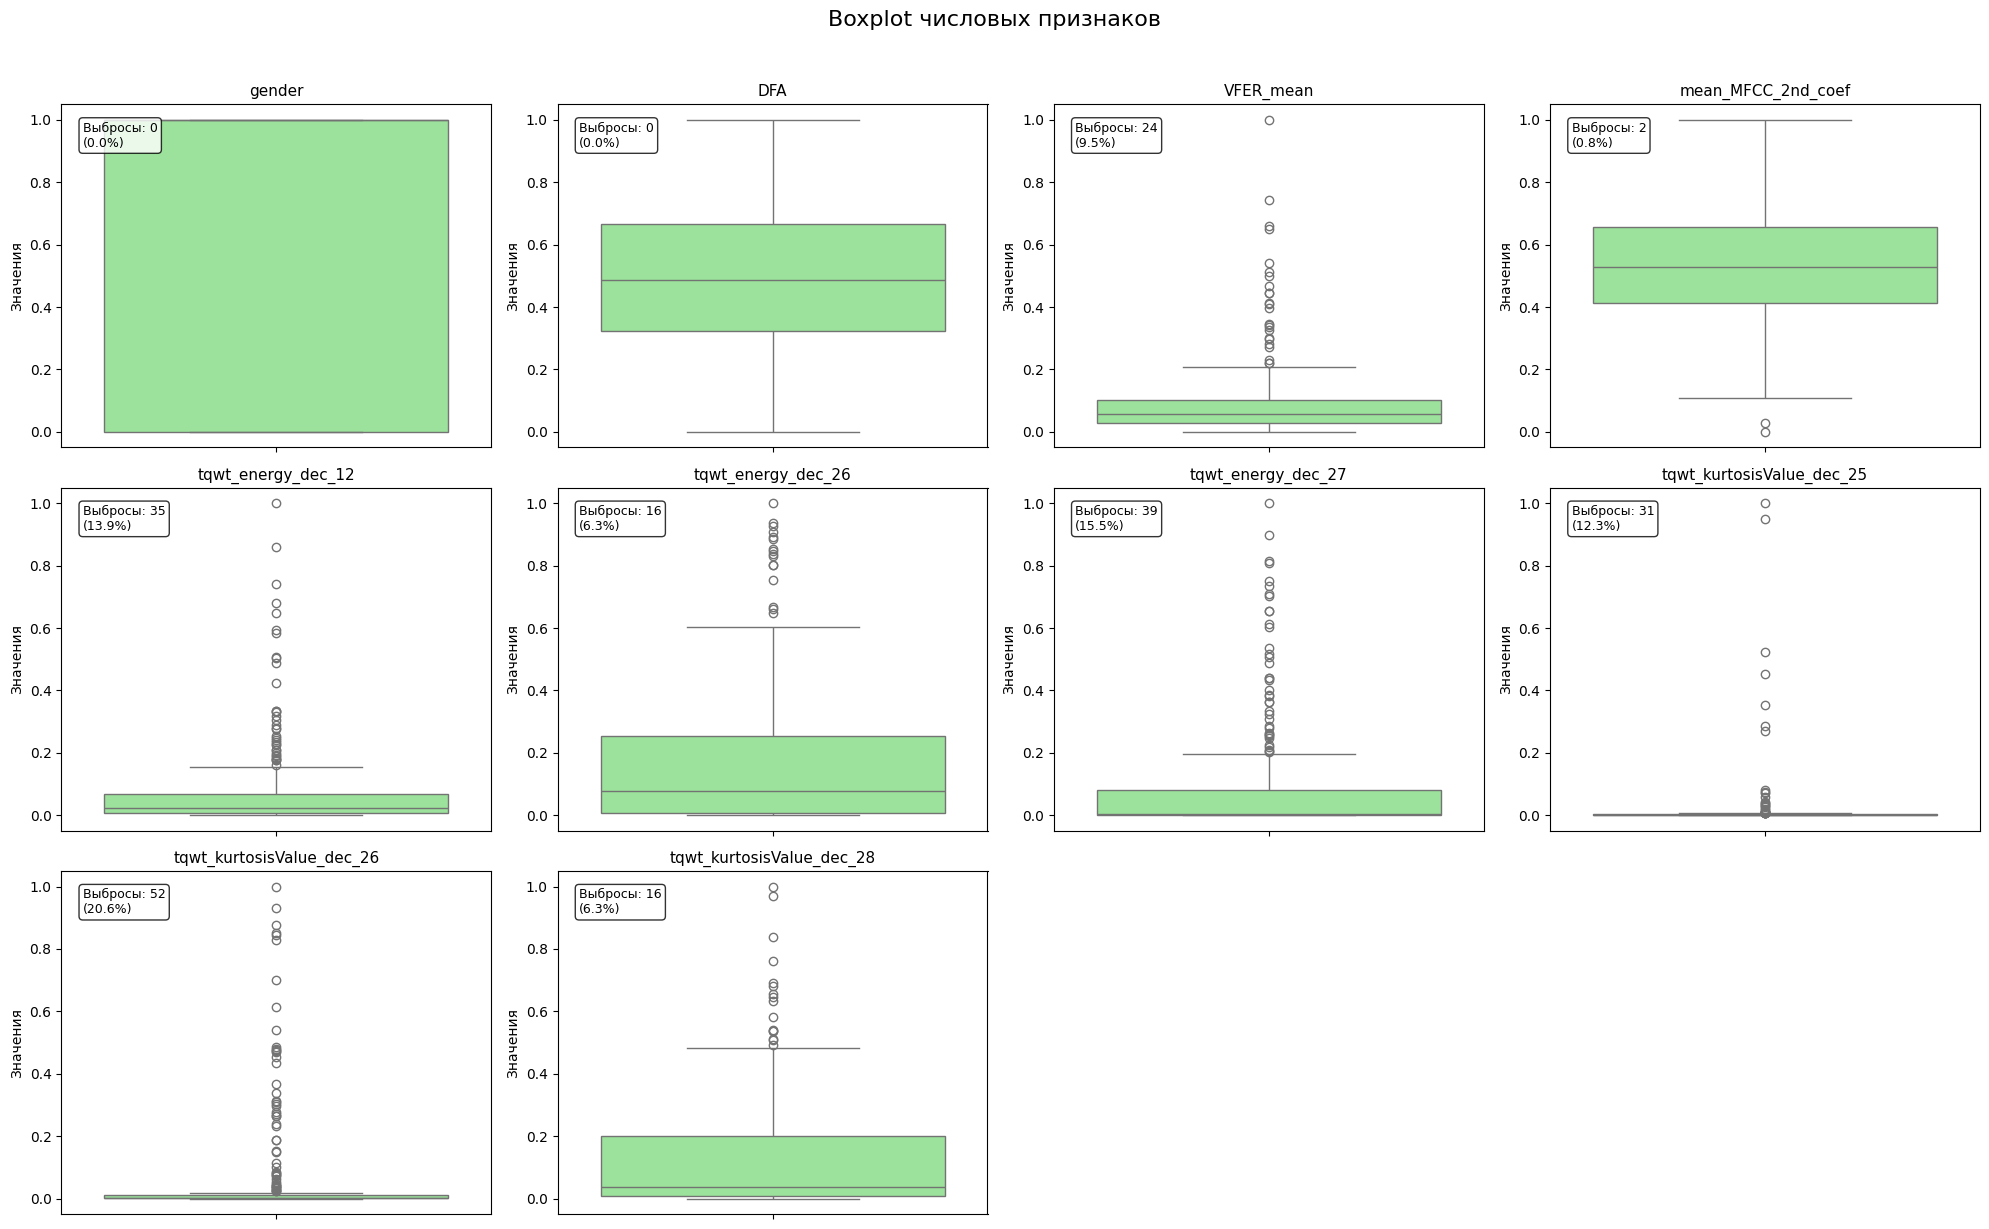

In [77]:
visualize_dataset_attributes(data, target_col='class')

Напишите выводы по полученным графикам

6.3. Выполнить ***оценку баланса класса*** с помощью круговой диаграммы распределения результирующего атрибута.


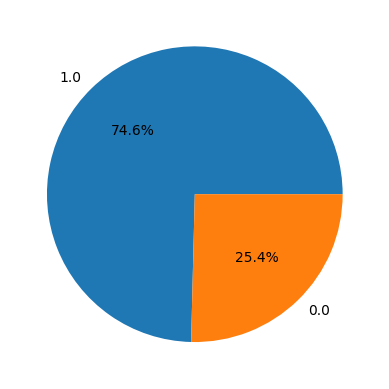

In [78]:
x = data['class'].value_counts()
plt.pie(x.values,
        labels = x.index,
        autopct='%1.1f%%')
plt.show()

Напишите выводы